In [1]:
from bonsai.visualizer import *
import time
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
pd.options.display.max_columns = 100
plt.style.use('material')

%load_ext autoreload
%autoreload 2

# Prune Visualization

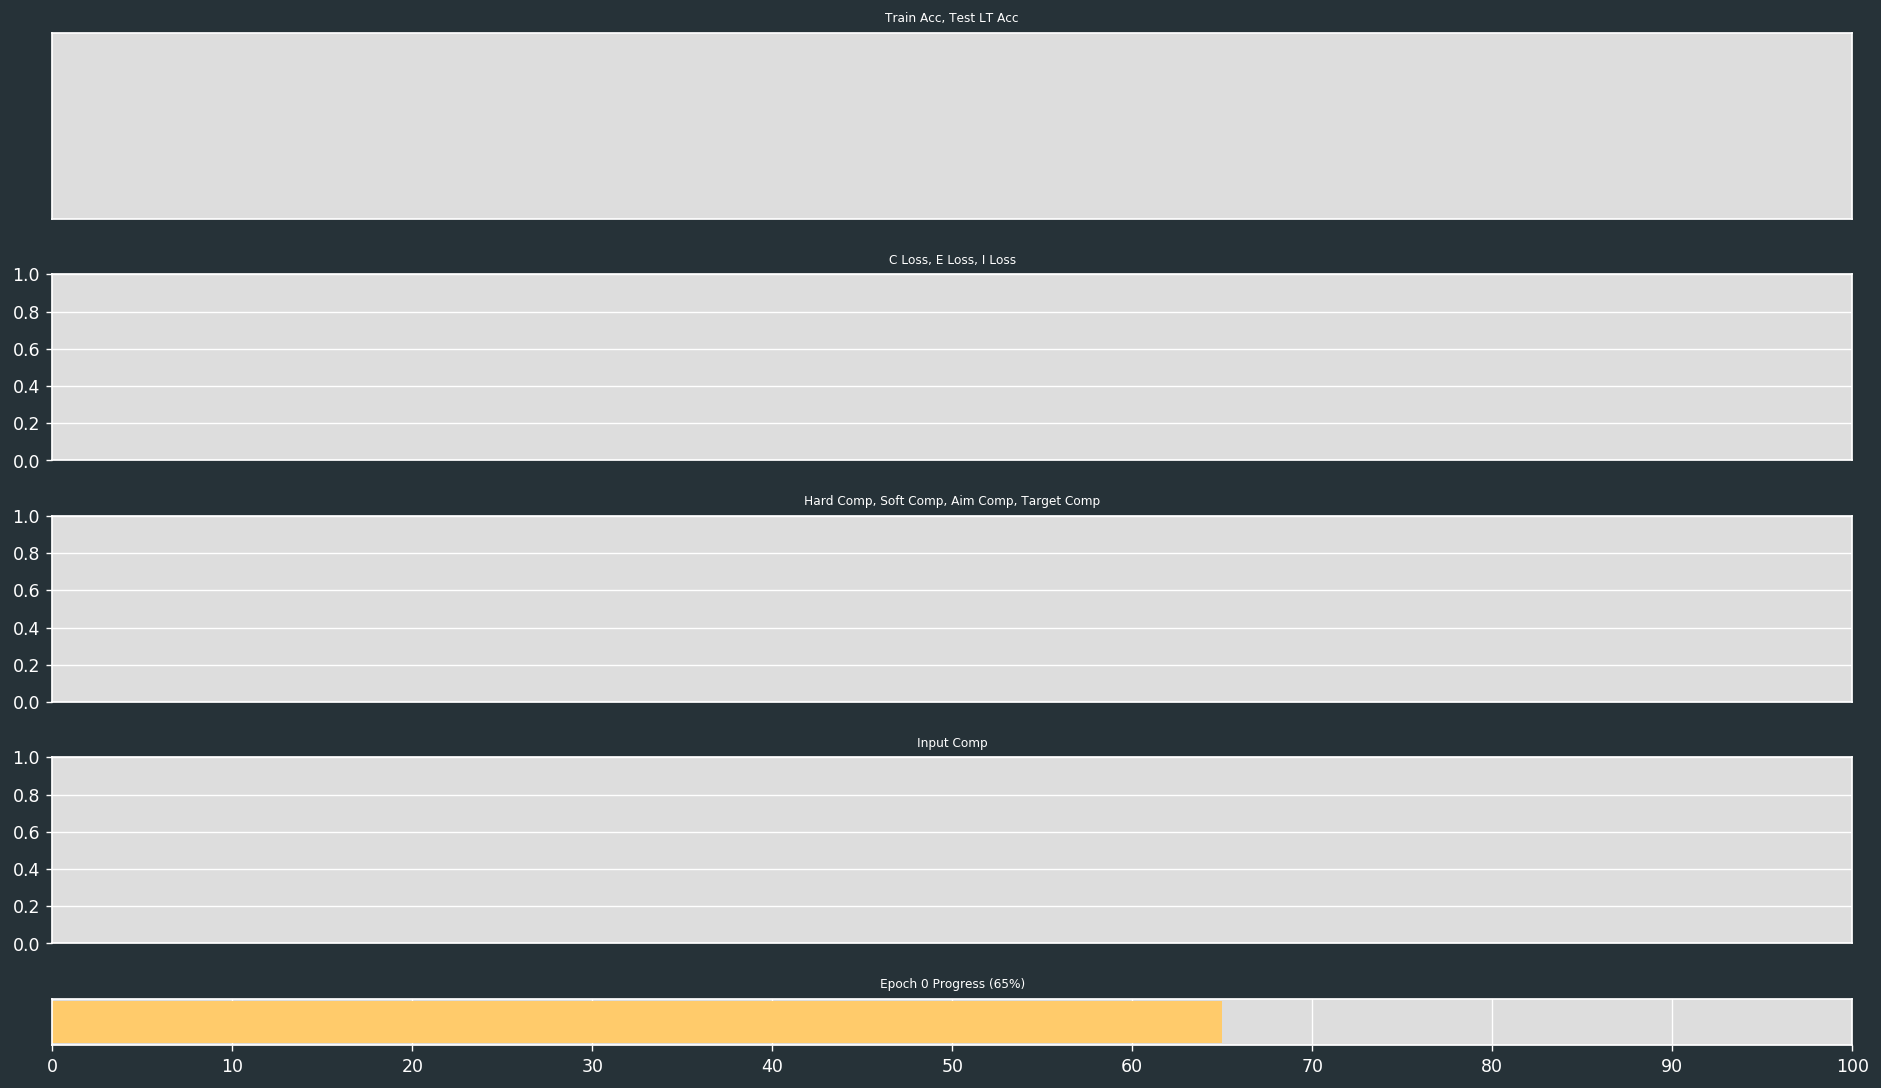

In [ ]:
PrunePlot((16,9)).monitor()

# Train Visualization

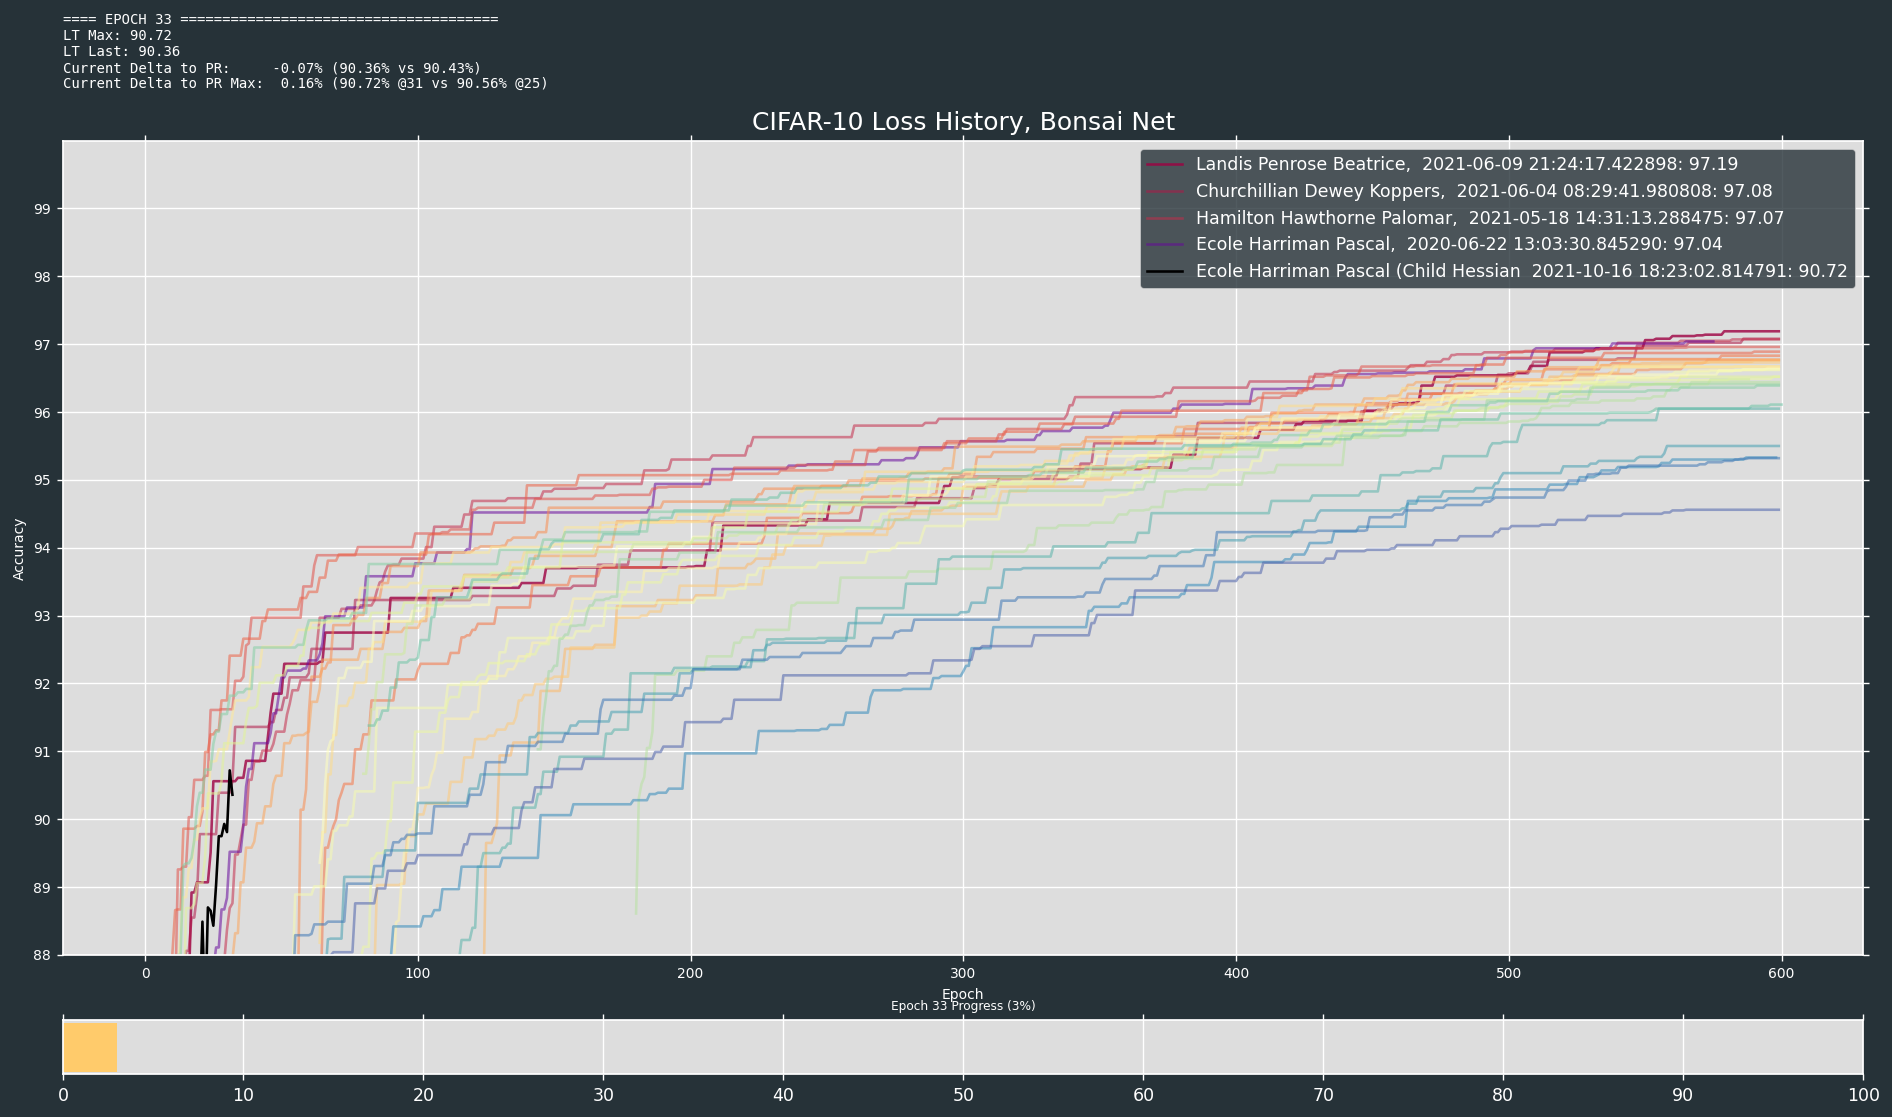

KeyboardInterrupt: 

In [4]:
TrainPlot('Ecole Harriman Pascal', (16,9)).monitor()

# Jupyter Notebook Output

In [ ]:
prev_out = None
out = "something"
state = 0
states = [".","..","..."]
while 1:
    with open('logs/jn_out.log',"r") as f:
        lines = f.readlines()
    out = ""
    for i,line in enumerate(lines):
        if "|carr_ret|" not in line:
            out+=line
    if prev_out!=out:
        clear_output()
        print(out)
        prev_out, state = out, 0
    else:
        state = 0 if state==2 else state+1
        print("\r{:<3}".format(states[state]),end="")
        time.sleep(1)

=========================== NETWORK ===========================
==================== Ecole Harriman Pascal ====================
                     :     Dim      :    Params    :   Comp   
Initializer          :              :     320      :          
Cell 0  (Normal)     :   64 x 32    :   673,300    :  100.0%  
 ↳ Classifier        :              :     650      :          
Total                :              :   674,270    :  100.0%  

=== 1 Patterns. Target Comp: 0.46, Aim: 0.42
Starting at 2020-06-22 10:23:33.450827
06/22/2020 10:23 AM
Init:   36.00MiB
0:    8.65GiB
Classifier:    8.65GiB
Train Epoch: 0   [12512 /50000  (100%)]	Comp Ratio: [E: 0.674, I: 0.000], Loss Comp: [C: 1.644, E: 0.051, I: 0.00], Per Epoch: 2m,57s , Alloc: 8.65GiB, Data T: 9.725 , Op T: 476.610
Train Corrects: Top-1: 29.13%, Comp: 0.67, 0.00 8m,6s
Train Loss Components: C: 1.644, E: 0.051, I: 0.00

Deadheaded 0 operations
Param Delta: 674,270 -> 674,270
Soft Comp: 0.677, Hard Comp: 1.000
Last Tower Test  Co

...

In [8]:
df = proc_all_runs()
df
#df.loc[3600]
#min(df.loc[3577]['Params'])
#df.loc[3604]

,AT Test Top-1,Aux,Classes,Deadhead,Dim,Epoch_Times,Epochs,ID,LT Test Top-1,Loss Accuracy,Loss Edge,Loss Input,N,Nodes,Params,Patterns,Pruners,Reductions,Scale,Spacing,Start Time,Total_Train_Time,Train Top-1,LT Test Top-1 Max,Epoch
0,[],NaN,NaN,"[0, 0]",NaN,[],"[0, 1]",NaN,[17.68],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-11 10:07:32.966476,0.00s,[24.0],17.68,1
1,[],True,NaN,[0],"[2048, 3, 32, 32]",[],[0],NaN,[],[],[],[],NaN,3.0,NaN,NaN,True,2.0,2.0,1.0,2019-06-11 10:09:18.629224,0.00s,[],0.00,0
2,[],True,NaN,"[0, 0]","[2048, 3, 32, 32]",[],"[0, 1]",NaN,[12.03],[],[],[],NaN,3.0,NaN,NaN,True,2.0,2.0,1.0,2019-06-11 10:10:06.356830,0.00s,[22.52],12.03,1
3,[],True,NaN,"[0, 0]","[2048, 3, 32, 32]",[],"[0, 1]",NaN,[24.83],[],[],[],NaN,3.0,NaN,NaN,True,2.0,2.0,1.0,2019-06-11 10:11:12.910642,0.00s,[32.54],24.83,1
4,[],True,NaN,[0],"[64, 3, 32, 32]",[],[0],NaN,[],[],[],[],NaN,6.0,NaN,NaN,True,5.0,3.0,3.0,2019-06-11 10:12:32.888662,0.00s,[],0.00,0
5,[],True,NaN,[0],"[64, 3, 32, 32]",[],[0],NaN,[],[],[],[],NaN,6.0,NaN,NaN,True,5.0,3.0,3.0,2019-06-11 10:14:11.580808,0.00s,[],0.00,0
6,[],True,NaN,[0],"[64, 3, 32, 32]",[],[0],NaN,[],[],[],[],NaN,6.0,NaN,NaN,True,5.0,3.0,3.0,2019-06-11 10:36:21.880656,0.00s,[],0.00,0
7,[],True,NaN,"[0, 0, 0, 0, 0, 0]","[64, 3, 32, 32]","[3189, 3193, 3196, 3200, 3200]","[0, 1, 2, 3, 4, 5]",NaN,"[35.7, 48.47, 62.74, 65.19, 69.08]",[],[],[],NaN,6.0,NaN,NaN,True,5.0,3.0,3.0,2019-06-11 10:39:23.575844,"4h,26m,18s","[40.13, 51.62, 58.02, 64.3, 64.81]",69.08,5
8,[],True,NaN,[0],"[2048, 3, 32, 32]",[],[0],NaN,[],[],[],[],NaN,3.0,NaN,NaN,True,2.0,2.0,2.0,2019-06-11 15:51:24.336246,0.00s,[],0.00,0
9,[],True,NaN,[0],"[2048, 3, 32, 32]",[],[0],NaN,[],[],[],[],NaN,3.0,NaN,NaN,True,2.0,2.0,2.0,2019-06-11 15:51:48.510565,0.00s,[],0.00,0


# Specific Comparisons

In [17]:
df = proc_all_runs()
#df = df[(df['ID']=='Churchillian Dewey Koppers')|(df['ID']=='Landis Penrose Beatrice')]
#df[]

In [16]:
df[df['ID']=='Ecole Harriman Pascal']

,AT Test Top-1,Aux,Classes,Deadhead,Dim,Epoch_Times,Epochs,ID,LT Test Top-1,Loss Accuracy,Loss Edge,Loss Input,N,Nodes,Params,Patterns,Pruners,Reductions,Scale,Spacing,Start Time,Total_Train_Time,Train Top-1,LT Test Top-1 Max,Epoch
3845,[],NaN,10.0,"[0, 0, 0, -51, -6]","[64, 3, 32, 32]","[486, 485, 485, 488, 374]","[0, 1, 2, 3, 4]",Ecole Harriman Pascal,"[37.41, 42.98, 48.04, 51.6, 54.43]","[1.644, 1.73, 1.937, 1.626, 1.675]","[0.051, 0.042, 0.044, 0.04, 0.038]","[0.0, 0.0, 0.0, 0.0, 0.0]",1.0,7.0,"[674270, 674270, 674270, 507307, 481253]",NaN,NaN,NaN,64.0,NaN,2020-06-22 10:23:33.450827,"38m,38s","[29.13, 37.56, 43.45, 47.36, 49.89]",54.43,4
3846,[],NaN,10.0,"[0, 0, 0, -15, -4]","[64, 3, 32, 32]","[325, 326, 324, 321, 269]","[0, 1, 2, 3, 4]",Ecole Harriman Pascal,"[36.67, 43.38, 48.69, 50.54, 53.26]","[1.719, 2.011, 2.048, 1.926, 0.985]","[0.023, 0.018, 0.025, 0.021, 0.021]","[0.0, 0.0, 0.0, 0.0, 0.0]",1.0,7.0,"[481253, 481253, 481253, 385302, 380498]",NaN,NaN,NaN,64.0,NaN,2020-06-22 11:03:59.756463,"26m,5s","[29.46, 37.48, 43.42, 47.2, 49.56]",53.26,4
3847,[],NaN,10.0,"[0, 0, 0, -7, 0]","[64, 3, 32, 32]","[253, 254, 253, 253, 229]","[0, 1, 2, 3, 4]",Ecole Harriman Pascal,"[38.54, 43.59, 47.22, 52.27, 54.09]","[1.743, 1.585, 1.816, 1.742, 1.534]","[0.012, 0.014, 0.013, 0.009, 0.008]","[0.0, 0.0, 0.0, 0.0, 0.0]",1.0,7.0,"[380498, 380498, 380498, 330443, 330443]",NaN,NaN,NaN,64.0,NaN,2020-06-22 11:31:21.174622,"20m,42s","[30.15, 37.97, 43.49, 47.7, 50.01]",54.09,4
3848,[],NaN,10.0,"[0, 0, 0, -3, -1]","[64, 3, 32, 32]","[225, 225, 225, 226, 215]","[0, 1, 2, 3, 4]",Ecole Harriman Pascal,"[39.2, 45.25, 49.78, 51.31, 54.25]","[1.689, 1.56, 1.85, 1.429, 1.696]","[0.009, 0.005, 0.005, 0.01, 0.006]","[0.0, 0.0, 0.0, 0.0, 0.0]",1.0,7.0,"[330443, 330443, 330443, 312968, 312967]",NaN,NaN,NaN,64.0,NaN,2020-06-22 11:53:06.736131,"18m,36s","[30.21, 37.92, 43.92, 48.17, 50.68]",54.25,4
3849,[],NaN,10.0,"[0, 0, 0, -2]","[64, 3, 32, 32]","[213, 213, 213, 213]","[0, 1, 2, 3]",Ecole Harriman Pascal,"[40.48, 44.62, 51.02, 54.21]","[1.826, 1.469, 1.322, 1.445]","[0.003, 0.002, 0.002, 0.002]","[0.0, 0.0, 0.0, 0.0]",1.0,7.0,"[312967, 312967, 312967, 293765]",NaN,NaN,NaN,64.0,NaN,2020-06-22 12:12:41.858535,"14m,12s","[30.92, 38.79, 44.4, 48.18]",54.21,3
3850,[],NaN,10.0,"[0, 0, 0, -43]","[64, 3, 32, 32]","[521, 521, 511, 508]","[0, 1, 2, 3]",Ecole Harriman Pascal,"[43.6, 50.64, 55.23, 58.7]","[2.143, 1.821, 1.811, 1.8]","[0.036, 0.024, 0.023, 0.016]","[0.0, 0.0, 0.0, 0.0]",2.0,7.0,"[2690340, 2690340, 2690340, 2033401]",NaN,NaN,NaN,64.0,NaN,2020-06-22 12:27:38.711685,"34m,21s","[32.54, 42.09, 47.92, 52.74]",58.70,3
3851,[],NaN,10.0,"[0, 0, 0, -11, -4, -6, -2, -4, -6, -5, -3, -4,...","[64, 3, 32, 32]","[586, 586, 586, 586, 581, 579, 573, 571, 566, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",Ecole Harriman Pascal,"[48.54, 57.79, 61.86, 66.06, 68.86, 71.11, 72....",[],[],[],3.0,7.0,"[11003920, 11003920, 11003920, 10935557, 10867...",NaN,NaN,NaN,64.0,NaN,2020-06-22 13:03:30.845290,"76h,18m,19s","[34.91, 45.81, 52.15, 57.02, 60.3, 62.77, 65.1...",97.04,576


In [15]:
df[df['LT Test Top-1 Max']==97.08]['Params']

4139    NaN
Name: Params, dtype: object

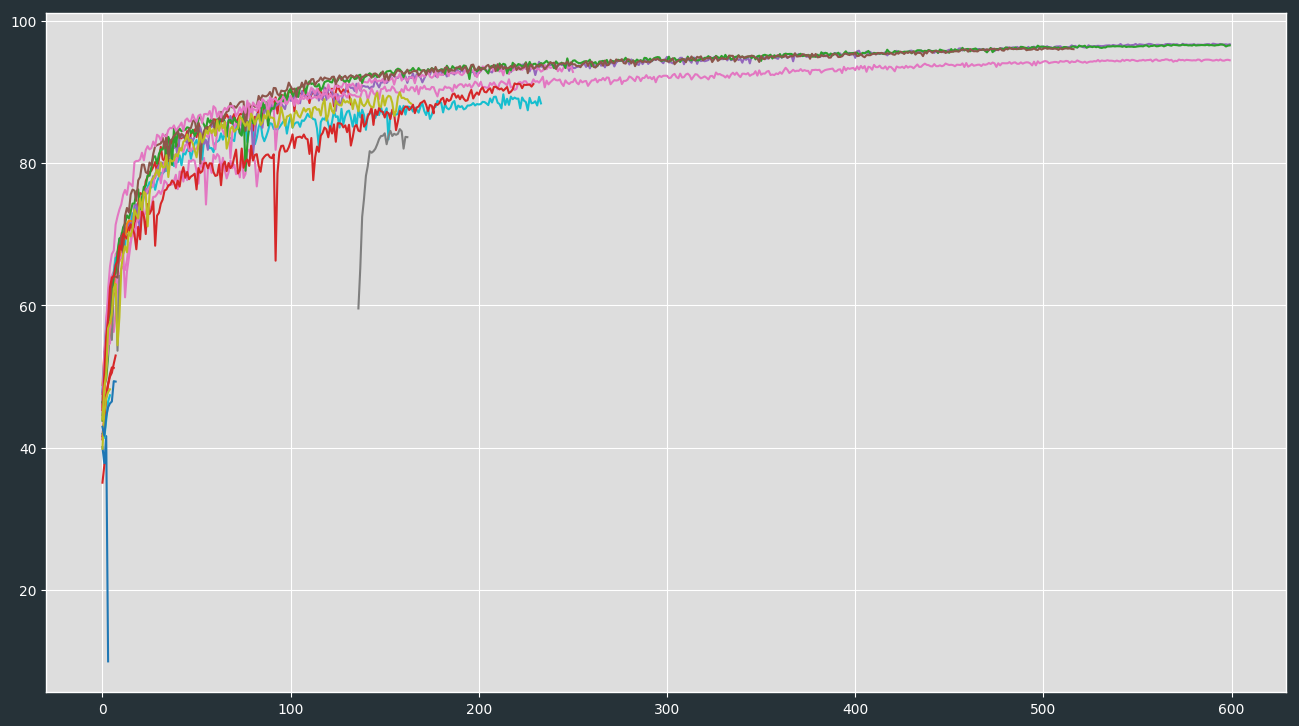

In [8]:
df = proc_all_runs()
df = df[df['Start Time'].apply(lambda x: '2020-02' in x)]
df = df.groupby('ID')['Epochs','LT Test Top-1','Start Time','LT Test Top-1 Max'].agg(list)
df['Epochs'] = df['Epochs'].apply(lambda x: [sub for l in x for sub in l])
df['LT Test Top-1'] = df['LT Test Top-1'].apply(lambda x: [sub for l in x for sub in l])
df['LT Test Top-1 Max'] = df['LT Test Top-1 Max'].apply(max)
for idx,row in df.iterrows():  
    stop = min(len(row['Epochs']),len(row['LT Test Top-1']))
    plt.plot(row['Epochs'][:stop],row['LT Test Top-1'][:stop])
plt.show()

#

In [ ]:
df = proc_all_runs()
df

In [ ]:
full_runs = df[df[['LT Test Top-1','Epochs']].\
    apply(lambda x: len(x['LT Test Top-1']) > 512,axis=1)]. \
    sort_values(by='LT Test Top-1 Max', ascending=False)
full_runs[['ID','LT Test Top-1','LT Test Top-1 Max']]

In [ ]:

full